# Data Mining Tutorial Week 5

In this tutorial, we will learn how to use **K-means** algorithm implemented in **scikit-learn** to do clustering. There are three datasets provided for you to try:
1. A generated two-dimensional data, which can easily show the effect of clustering; 
2. An image datasets containing the hand written digits for 0, 1, 2, 3, 4, 5, which is a subset of the famous MNIST data; 
3. Another generated two-dimensional data but in a spiral shape.  

## Case 1: A Generated Two Dimensional Datasets  

In this part, a data called **dummy_data.csv** will be loaded and used for clustering. Besides learning how to run the K-means algorithm on the data, we will also see the impact of different parameter settings.

1. Load the data. 

In [3]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# Load data
data_frame = pd.read_csv('dummy_data.csv')

X = data_frame[['x', 'y']].values
label = data_frame['label'].values

2. See how the data are distributed.

<Figure size 432x432 with 0 Axes>

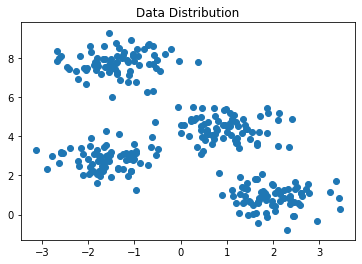

<Figure size 432x432 with 0 Axes>

In [4]:
# Data distribution visualization
plt.scatter(X[:, 0], X[:, 1]) # Plot data points distribution
plt.title('Data Distribution') 
plt.figure(figsize=(6,6))

3. Apply the **kmeans** function in the *sklearn* package

Please visit https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for the detailed documentation.

Please pay attention to the *random_state* setting below. 

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state= 1) # Set the total number of the cluster, i.e, k,to be 8
# ***Note that for running k-means, the first step is to randomly select several data points as the "initial" center points. 
# ***Thus we fix the random_state to be the random seed 1, such that the results can be reproducible. 

kmeans.fit(X) # Compute k-means clustering
y_kmeans = kmeans.predict(X) # Allocate the data points to a specific cluster

4. Illustrate the clustering results

Here the cluster centers are denoted by a balck X.

Text(0.5, 1.0, 'Clustering Result')

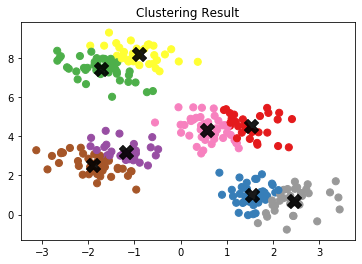

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Set1') # Plot data points based on the cluster allocation
centers = kmeans.cluster_centers_ # Get cluster center info 
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, alpha=0.9); # Plot the cluseter center as the black X
plt.title('Clustering Result')

### Trying different random seeds

Different random seeds can result in different clustering results. Let us see. 

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state = 1) # Set the total number of the cluster to be 8, and random_state to be 1

kmeans.fit(X) # Compute k-means clustering
y_kmeans = kmeans.predict(X) # Allocate the data points to specific cluster

Text(0.5, 1.0, 'Clustering Result')

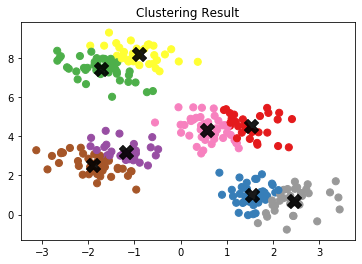

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Set1') # Plot data points based on the cluster allocation
centers = kmeans.cluster_centers_ # Get cluster center info 
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, alpha=0.9); # Plot the cluseter center as the black X
plt.title('Clustering Result')

We can see that different random seeds may lead to different clustering results

### Trying differnet *k*

Different *k* can also give us different clustering results.

1. *k=5*

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state = 1)
kmeans.fit(X) # Compute k-means clustering

y_kmeans = kmeans.predict(X)

Text(0.5, 1.0, 'Ground Truth')

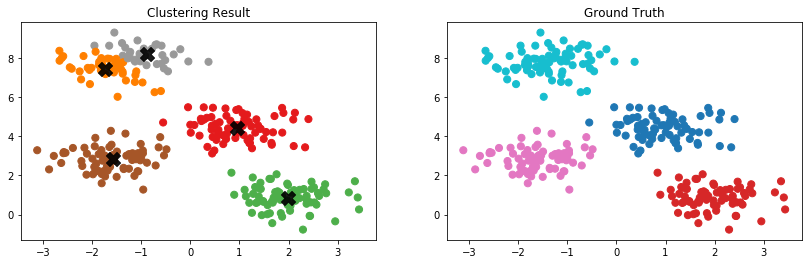

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) # Initialize the subplots

# Plot the clustering result
axs[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Set1') # Plot data points based on the cluster allocation
centers = kmeans.cluster_centers_ # Get cluster center info 
axs[0].scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, alpha=0.9); # Plot the cluseter center as the black X
axs[0].set_title('Clustering Result')

# Plot the ground truth
axs[1].scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='tab10')
axs[1].set_title('Ground Truth')

2. *k*=4

In [9]:
kmeans = KMeans(n_clusters=4, random_state = 1)

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Text(0.5, 1.0, 'Ground Truth')

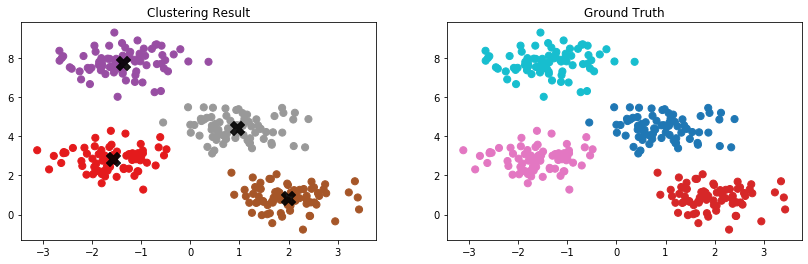

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) # Initialize the subplot

# Plot the clustering result
axs[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Set1') # Plot data points based on the cluster allocation
centers = kmeans.cluster_centers_ # Get cluster center info 
axs[0].scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, alpha=0.9); # Plot the cluseter center as the black X
axs[0].set_title('Clustering Result')

# Plot the ground truth
axs[1].scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='tab10')
axs[1].set_title('Ground Truth')

##  Case 2: MNIST -- A Large Dataset of Handwritten Digits

We will see the effect of running K-means on a real dataset. This is a subset for MNIST data. More details regarding MNIST data can be found at http://yann.lecun.com/exdb/mnist/.

We first load the data:

In [11]:
data_frame = pd.read_csv('digits_modified.csv',header=None)


X = data_frame.values[:, 1:]
label = data_frame.values[:,0]

print(data_frame)

      0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0       5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1       4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3       4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6013    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
6014    2    0    0    0    0    0    0    0    0    0  ...    0    0    0   
6015    3    0    0    0    0    0    0    0    0    0  ...    0    0    0   
6016    4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
6017    5    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      778  779  780  781  782  783  784  
0       0    0    0  

Let us we have a look at part of the data: 

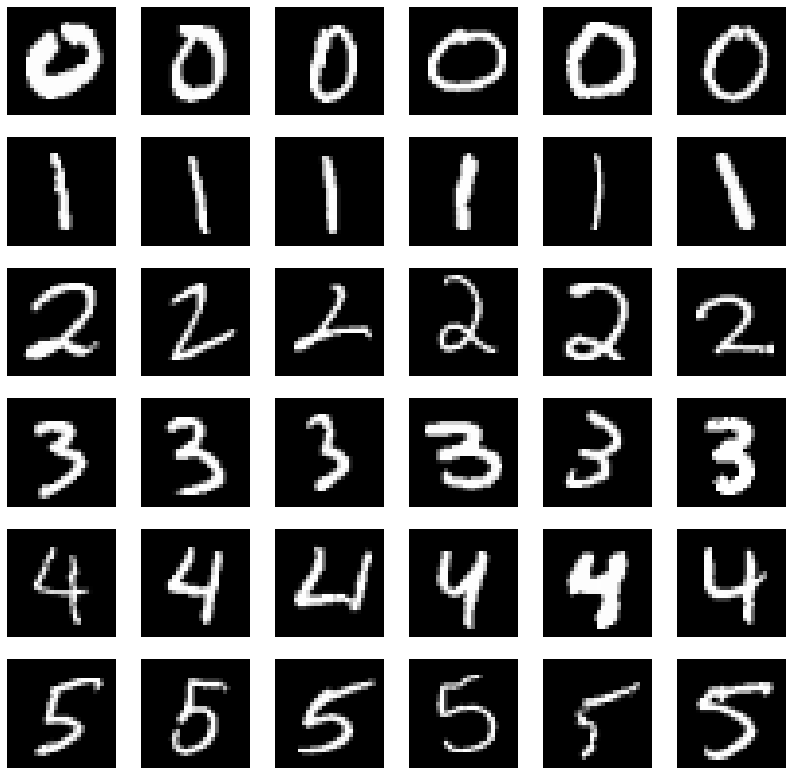

In [12]:
images = X.reshape(label.shape[0], 28, 28) # Reshape the array to actual image dimension (# of images, x_dim, y_dim)
row = 6 # Number of rows in the subplot  
column = 6 # Number of columns in the subplot
fig, axs = plt.subplots(row, column, figsize = (14, 14))
plt.gray() # We would like the imgs are shown in the grayscale.
for i in range(row):
    for j in range(column):
        axs[i][j].matshow(images[label==i][j]) # For each row, we display one class of digits
        axs[i][j].axis('off')


We then run K-means. 

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=53) 

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

How to show the results of running K-means? We will first show the centroid of each cluster.

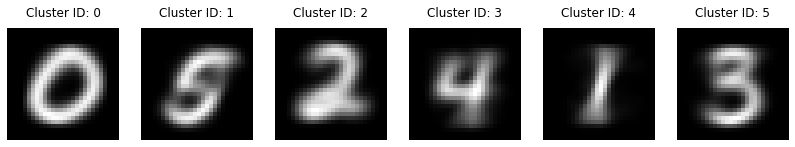

In [14]:
# record centroid values
centroids = kmeans.cluster_centers_
# reshape centroids into images
centroid_reconstructed_image = centroids.reshape(6, 28, 28)

fig, axs = plt.subplots(1, 6, figsize = (14, 14))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(centroid_reconstructed_image[i])
    ax.set_title('Cluster ID: {}'.format(i))
    ax.axis('off')
    
# display the figure
plt.show()

We can see that each centroid represents one digit in {0,5,2,4,1,3}. We then show the first 30 images and which cluster they belong to. 

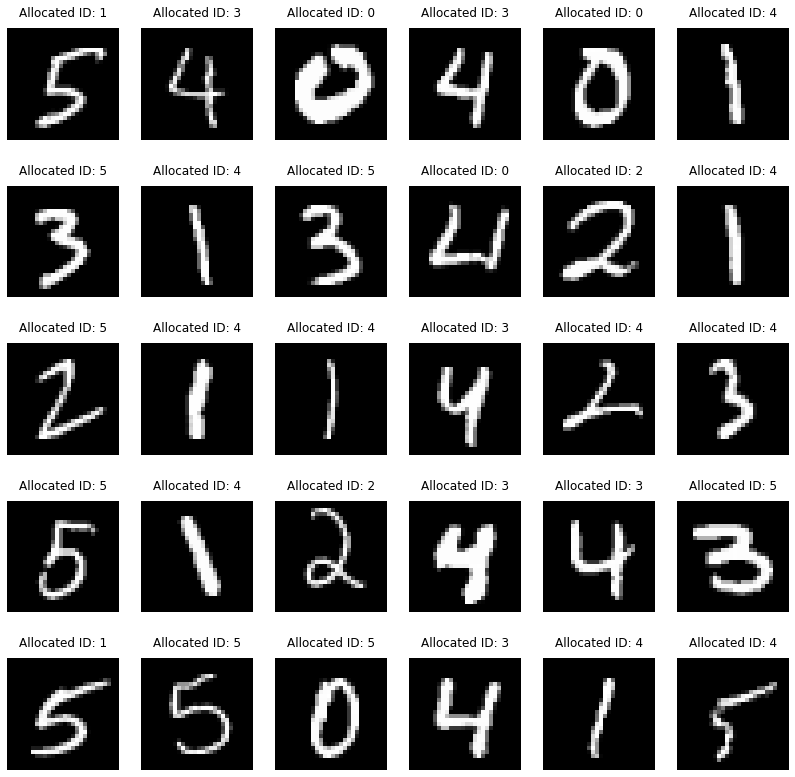

In [15]:
fig, axs = plt.subplots(5, 6, figsize = (14,14))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.set_title('Allocated ID: {}'.format(y_kmeans[i]))
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
plt.show()

Most of them have been correctly clustered into the correpdoning digit type. We can also find some errors. For example, "5" can be clustered to "1" or "3". 

## Case 3: A Spiral Dataset

For this data, we will show the limitation of K-means algorithm, which fails on spiral data.We fist load the data and illustrate them.

In [16]:
# Load data
data_frame = pd.read_csv('spiral.csv')
data_frame
X = data_frame[['x', 'y']].values
label = data_frame['label'].values

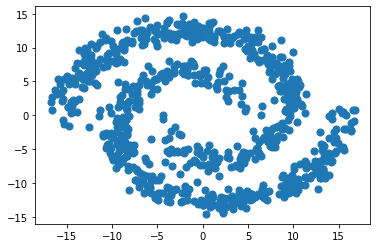

In [17]:
# Visualize the ground truth
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

We can easily see that there are natually two clusters within the data. Can K-means do the same clustering as human eyes? Let's see. 

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state = 1)

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

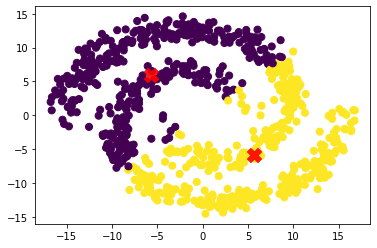

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.9);

The K-means failed here. Do other parameter settings lead to the same effect? Please try and see.

### *Topic not covered by lectures or assessments

So what kind of algorithm can succesfully cluster the spiral data? There is another algorithm called Spectral Clustering, which will not be covered in this course. We demo its effect here for your interest.

More information regarding spectral clustering
Andrew Y. Ng, Michael I. Jordan, Yair Weiss. On Spectral Clustering: Analysis and an algorithm. NIPS 2001: 849-856.

More information regarding the implemented SpectralClustering algorithm: 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

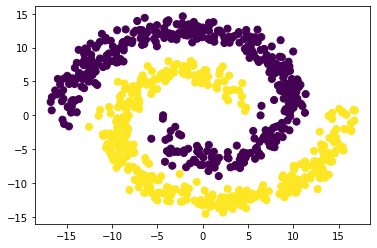

In [20]:
from sklearn.cluster import SpectralClustering

SC = SpectralClustering(n_clusters=2, random_state = 1)

SC.fit(X)
y_kmeans = SC.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')